# Research On Big Online Store

**You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.**

### Load Libraries

In [1]:
#importing the libraries to be used in analyzing the data
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import datetime as dt
from scipy import stats as st
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter ('ignore')

## Part 1 - Prioritizing Hypotheses

Working on the hypothesese file

### Load The Data

In [2]:
#Getting info about size of the data, attributes, data types 
hypotheses = pd.read_csv('datasets/hypotheses_us.csv',sep=';')
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 388.0+ bytes


* We have above a dataset with 8 rows, and 5 columns
* For each hypothesis, we have 4 properties: reach, impact, confidence, effort
* According to these properties, we perform the prioritizing process  

In [3]:
for i in range(len(hypotheses)):
    print(i+1,')',hypotheses['Hypothesis'].loc[i])
    print()

1 ) Add two new channels for attracting traffic. This will bring 30% more users

2 ) Launch your own delivery service. This will shorten delivery time

3 ) Add product recommendation blocks to the store's site. This will increase conversion and average purchase size

4 ) Change the category structure. This will increase conversion since users will find the products they want more quickly

5 ) Change the background color on the main page. This will increase user engagement

6 ) Add a customer review page. This will increase the number of orders

7 ) Show banners with current offers and sales on the main page. This will boost conversion

8 ) Add a subscription form to all the main pages. This will help you compile a mailing list

9 ) Launch a promotion that gives users discounts on their birthdays



In [4]:
pd.options.display.max_colwidth = 210
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


### Data Preprocessing

*For convenience purpose lower case column names*

In [5]:
hypotheses.columns = hypotheses.columns.str.lower()

In [6]:
hypotheses.index = np.arange(1,10)

In [7]:
hypotheses.describe()

,reach,impact,confidence,effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


* Confidence has the highest mean among the other parameters
* There are a difference between the Q2,Q3 values between the different parameters
* In an overall look we can say that the properties values do not differ from  from each other significantly 

### EDA

<AxesSubplot:>

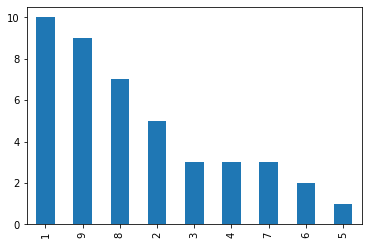

In [8]:
hypotheses['impact'].sort_values(ascending=False).plot(kind='bar')

* Hypothesis 1 got the highest impact value
* We see also that there the confidence of hypootheses 3,4,7 are almost the same

<AxesSubplot:>

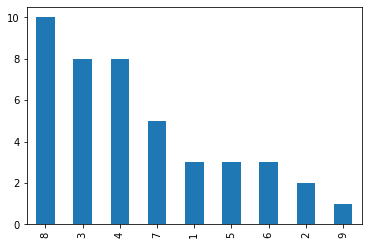

In [9]:
hypotheses['reach'].sort_values(ascending=False).plot(kind='bar')

* Hypothesis 8 got the highest reach value 
* We see also that there the reach of hypotheses 1,5,6 are almost the same

<AxesSubplot:>

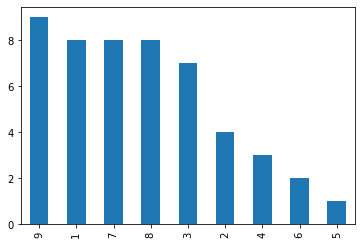

In [10]:
hypotheses['confidence'].sort_values(ascending=False).plot(kind='bar')

* Hypothesis 9 got the highest confidence value
* We see also that there the confidence of hypotheses 1,7,8 are almost the same

<AxesSubplot:>

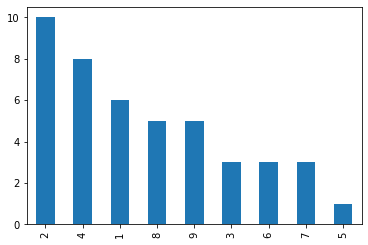

In [11]:
hypotheses['effort'].sort_values(ascending=False).plot(kind='bar')

* Hypthesis 2 got the highest effort value
* Hypotheses 8,9 have very similar values, same for 3,6,7 hypotheses

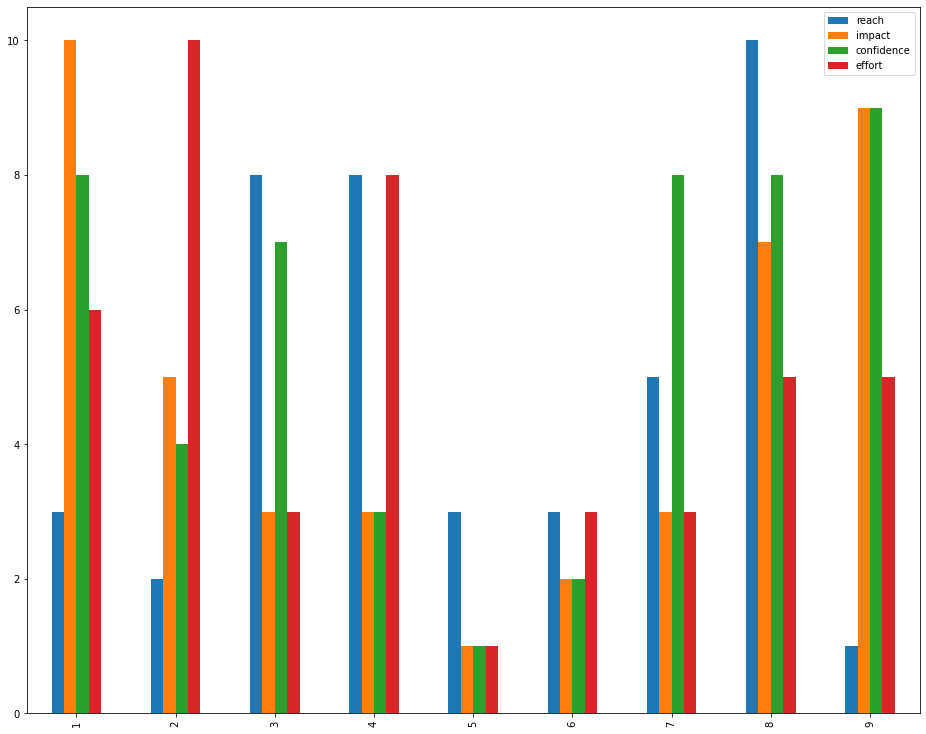

In [12]:
ax = hypotheses.plot(y=["reach", "impact", "confidence","effort"], kind="bar",figsize=(16, 13)) 

* Hypthesis 5 got the lowest parameter values except of the reach value
* Generally Hypotheses 4,6 got low values, that will appear again in the prioritizing ranks 
* Hypothesis 2, does not have a significantly high value except of the effort value, the highest aming its parameters and among all of the other hypotheses 
  * we can predict that this will stop it from getting at the top of the list of the hypotheses prioritizing
  * and that is because as the effort is higher the ICE/RICE value is lower 

### Prioritizing Hypotheses - ICE

In [13]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'])/hypotheses['effort']

print(hypotheses[['ICE']].sort_values(by='ICE', ascending=False))

         ICE
9  16.200000
1  13.333333
8  11.200000
7   8.000000
3   7.000000
2   2.000000
6   1.333333
4   1.125000
5   1.000000


* The 9th hypothesis got the highest rank, and that is thanks to its properties values
* As we mentioned above hypothesis 2 won't make it to the top of the list, due to the high effort value
* The 5th hypothesis got the lowest ranks,
  * It got the lowest effort value:
    * which is something that could pull its value up and would save it from being at the bottom of the list
    * although all of its other parameters are significantly low and that prevents the effort value from making the required result/effect

### Prioritizing Hypotheses - RICE

In [14]:
hypotheses['RICE'] =(hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']

print(hypotheses[['RICE']].sort_values(by=['RICE'], ascending=False))

    RICE
8  112.0
3   56.0
1   40.0
7   40.0
9   16.2
4    9.0
2    4.0
6    4.0
5    3.0


* Here the values are much higher because we have another parameter the 'Reach' parameter 
* Hypothesis 8 got the highest rank and that is thanks to its parameters especially the 'Reach' parameter
  * the highest among its properties
  * the highest among all of the other hypotheses 
* Hypothesis 9 dropped down to the 5th rank and that's due to its low reach value 
* Regarding to the the last rank, we see there are no change the 5th hypothesis still there 
  * Its high reach parameter value could not save it again 
  * It did got a higher 'RICE' value, but still not enough 

### Conclusions

* The difference between the 'RICE' and 'ICE' value, due to having another parameter in the picture which is the 'Reach' parameter
* The new parameter got to the Numerator so naturally that would increase the result values 
  * The 8 hypothesis got significantly high (RIC values - Numerator parameters) and not considerably high effort, due to this fact it got a peak and reached the highest RICE value 
  * The reach value of the 3th hypothesis pull it up three ranks higher, and made it to the top of the list
  * The reach value of the 4th hypothesis pull it up two ranks higher

## Part 2 - A/B Test Analysis

### Load Data

In [15]:
#Getting info about size of the data, attributes, data types 
orders = pd.read_csv('datasets/orders_us.csv',sep=',')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 37.5+ KB


* We have above a dataset with 1197 rows, and 5 columns
* For each order, we have 4 properties: visitorId, date, revenue, group 
* No null values

In [16]:
#Getting info about size of the data, attributes, data types 
visits = pd.read_csv('datasets/visits_us.csv',sep=',')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


* We have above a dataset with 62 rows, and 3 columns
* For each date, we have 2 properties: group, nummber of visits
* No null values

### Data Preprocessing

* Convert types of date columns in both of the columns

In [17]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [18]:
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

* Checking if the above operation done properly

In [19]:
print(orders['date'].head())

0   2019-08-15
1   2019-08-15
2   2019-08-15
3   2019-08-15
4   2019-08-15
Name: date, dtype: datetime64[ns]


In [20]:
print(visits['date'].head())

0   2019-08-01
1   2019-08-02
2   2019-08-03
3   2019-08-04
4   2019-08-05
Name: date, dtype: datetime64[ns]


### EDA

#### Data Visualization

In [21]:
orders['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

In [22]:
(orders.query('group=="A"'))['revenue'].describe()

count     557.000000
mean      115.897487
std       182.358918
min         5.000000
25%        20.400000
50%        50.100000
75%       130.500000
max      1450.200000
Name: revenue, dtype: float64

In [23]:
(orders.query('group=="B"'))['revenue'].describe()

count      640.000000
mean       145.063438
std        806.992326
min          5.100000
25%         24.050000
50%         50.350000
75%        130.225000
max      19920.400000
Name: revenue, dtype: float64

<AxesSubplot:>

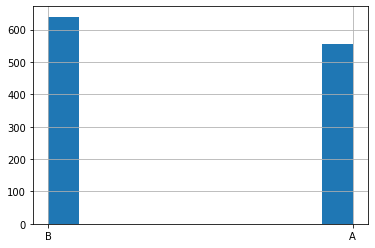

In [24]:
orders['group'].hist()

In [25]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

<AxesSubplot:>

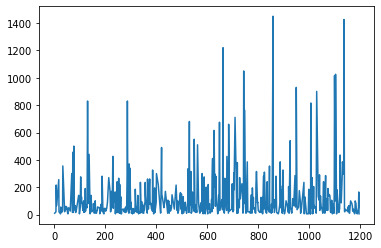

In [26]:
(orders.query('group=="A"'))['revenue'].plot()

<AxesSubplot:>

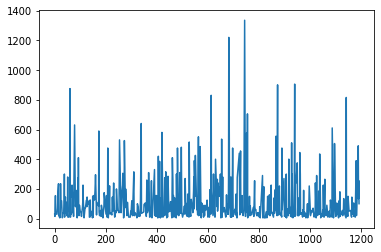

In [27]:
(orders.query('group=="B" & revenue < 2000'))['revenue'].plot()

#### Mutual visitors

In [28]:
lst_group_A_ids = (((orders.query('group=="A"'))['visitorId']).drop_duplicates()).values.tolist()
lst_group_B_ids = (((orders.query('group=="B"'))['visitorId']).drop_duplicates()).values.tolist()
mutual_visitors = set(lst_group_A_ids).intersection(lst_group_B_ids)
print('There are {0:} mutual visitors for group A & group B'.format(len(mutual_visitors)))

There are 58 mutual visitors for group A & group B


In [29]:
mutual_visitors_orders =  orders[orders['visitorId'].isin(mutual_visitors)]
mutual_visitors_orders = mutual_visitors_orders.groupby(['visitorId'],as_index=False).agg({'transactionId' : pd.Series.nunique})
mutual_visitors_orders.columns = ['visitorId', 'orders']
print(mutual_visitors_orders.sort_values(by='orders',ascending=False))

     visitorId  orders
56  4256040402      11
27  2458001652      11
26  2378935119       9
24  2038680547       8
12  1230306981       5
3    237748145       5
39  3062433592       5
1    199603092       5
43  3717692402       5
45  3803269165       5
29  2587333274       4
18  1614305549       4
7    457167155       4
52  3984495233       3
20  1668030113       3
55  4186807279       3
6    393266494       3
25  2044997962       3
13  1294878855       3
21  1738359350       3
35  2780786433       3
46  3891541246       3
16  1404934699       3
51  3972127743       2
44  3766097110       2
37  2949041841       2
47  3941795274       2
53  4069496402       2
48  3951559397       2
54  4120364173       2
42  3656415546       2
41  3234906277       2
40  3202540741       2
49  3957174400       2
38  2954449915       2
50  3963646447       2
0      8300375       2
36  2927087541       2
15  1333886533       2
2    232979603       2
4    276558944       2
5    351125977       2
8    471551

In [30]:
print(mutual_visitors_orders['orders'].describe())

count    58.000000
mean      3.120690
std       2.094919
min       2.000000
25%       2.000000
50%       2.000000
75%       3.000000
max      11.000000
Name: orders, dtype: float64


* In total there are 58 visitors who are mutual between both of the groups
* 50% of the mutual users made 2 orders in total (1 order as a visitor of group A, and the other one as a visitor of group B)
* We see also that there are few users with very high number of orders:
  * two users with 11 orders for each
  * another one with 9 orders 
  * one with 8 orders
* these peaks above of the orders number will appear again in our analysis

### Tasks

#### Graph cumulative revenue by group. Make conclusions and conjectures.

In [31]:
# building an array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# getting aggregated cumulative daily data on visitors  
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

print(cumulativeData.head()) 

        date group  orders  buyers  revenue  visits
0 2019-08-01     A      24      20   2356.8     719
1 2019-08-01     B      21      20   1620.0     713
2 2019-08-02     A      44      38   3860.3    1338
3 2019-08-02     B      45      43   4243.8    1294
4 2019-08-03     A      68      62   5675.5    1845


In [32]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

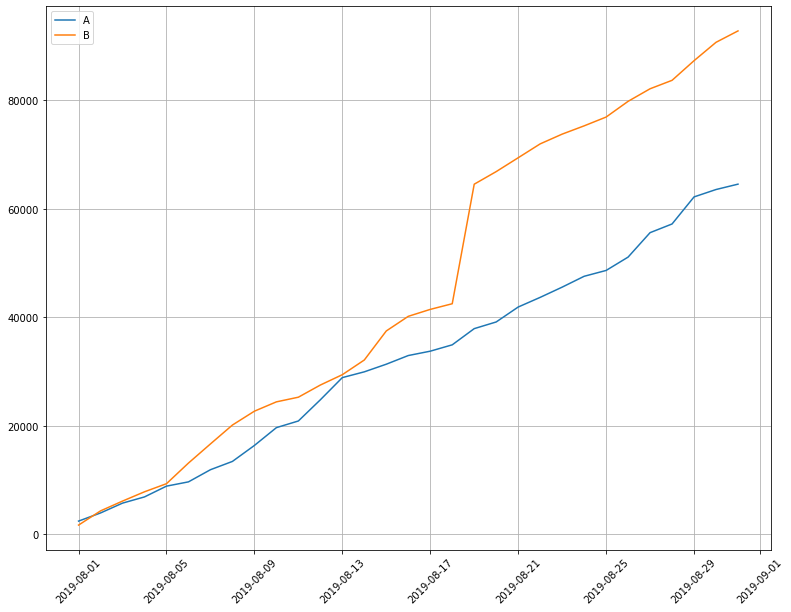

In [33]:
plt.figure(figsize=(13,10))
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.grid()
plt.legend();

* Between the dates 01-08-2019 to 04-08-2019 low revenue values, no significant diffrence between the groups
* Between 05-08-2019 to 12-08-2019 there is a moderate difference between the groups, revenue value increased 
* 13/08/2019 group B revenue decreases, group A revenue increases the curves seem to collide a bit
* From 14/08/2019 and on group B is the leader
  * Its revenue got increased and decreased back and fourth, although it was always higher than the revenue of group A 
  * both of the values of the groups got ups and downs: group B has more acute changes, group A has more balanced changes

#### Graph cumulative average order size by group. Make conclusions and conjectures.

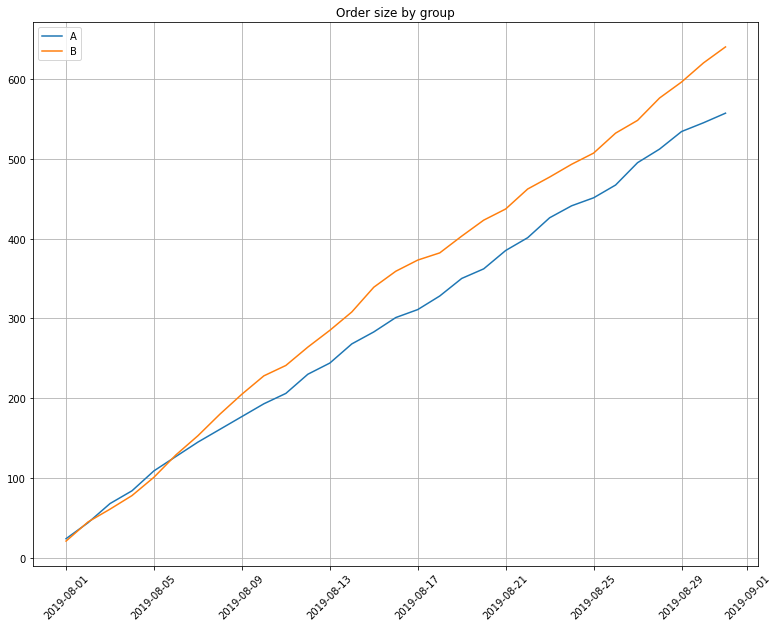

In [34]:
plt.figure(figsize=(13,10))
plt.title('Order size by group')
# Plotting the group A orders graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders'], label='A')

# Plotting the group B orders graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation = 45)
plt.grid()
plt.legend();

* Between the dates 01-08-2019 to 05-08-2019 there are is no significant difference on the purchase size between the groups A and B
  * the values collide around 02-08-2019 
  * group B has lower value between the dates 03/08 -04/08 
* From 05-08-2019 and the curves split from each other, purchase size increase for both of the groups 
  * Group B is the leader
  * Not a significant difference between the values
* On an overall look we see that the curves is ascending, but in between there are a little ups and down 
  * i.e the purchase size is not static neither increasing along the time actually it increases and decreases back and fourth 
    (balanced changes) 

#### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

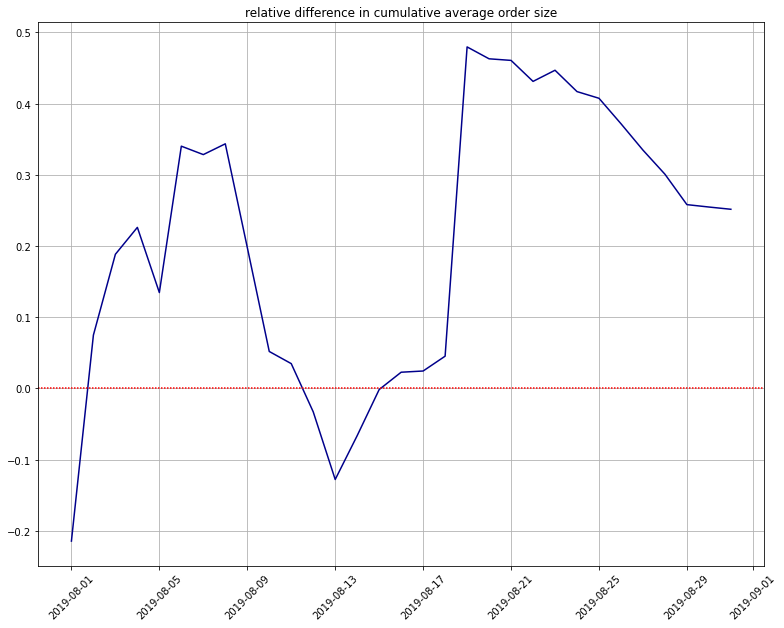

In [35]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',suffixes=['A', 'B'])
plt.figure(figsize=(13,10))
plt.title('relative difference in cumulative average order size')
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,color='darkblue')

plt.axhline(y=0, color='red', linestyle=(0, (1, 1))) 
plt.xticks(rotation = 45)
plt.grid();

* The graph shows that the difference values changes significantly along the time 
* There are multiple peak points 
  * 02-08-2019
  * 13-08-2019
  * 19-08-2019 
  * 29-08-2019
* The graph of the order size for each group did not show a considerable difference between the values, it might be to outlier values 
  * From the EDA section we observe outliers for group B

####  Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

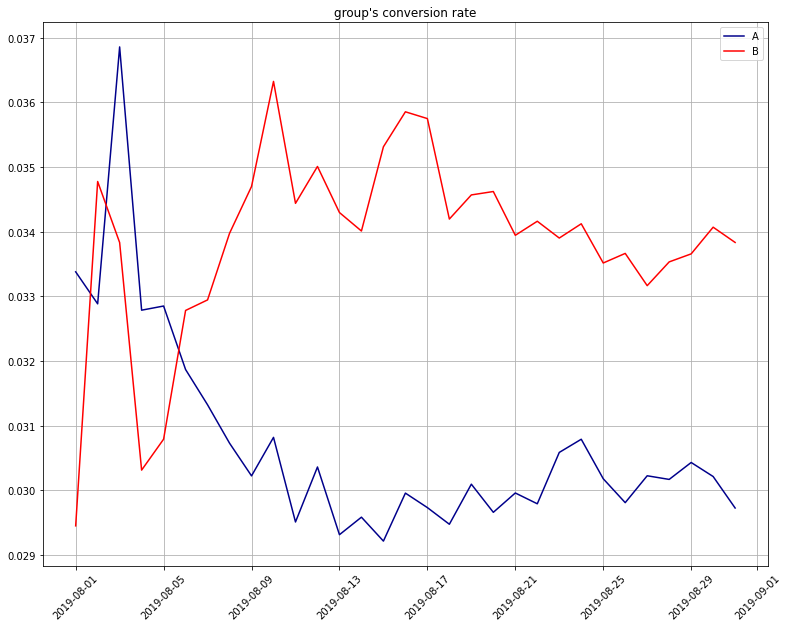

In [36]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(13,10))
plt.title("group's conversion rate")
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'],color='darkblue',label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'],color='red',label='B')
plt.xticks(rotation = 45)
plt.grid()
plt.legend();

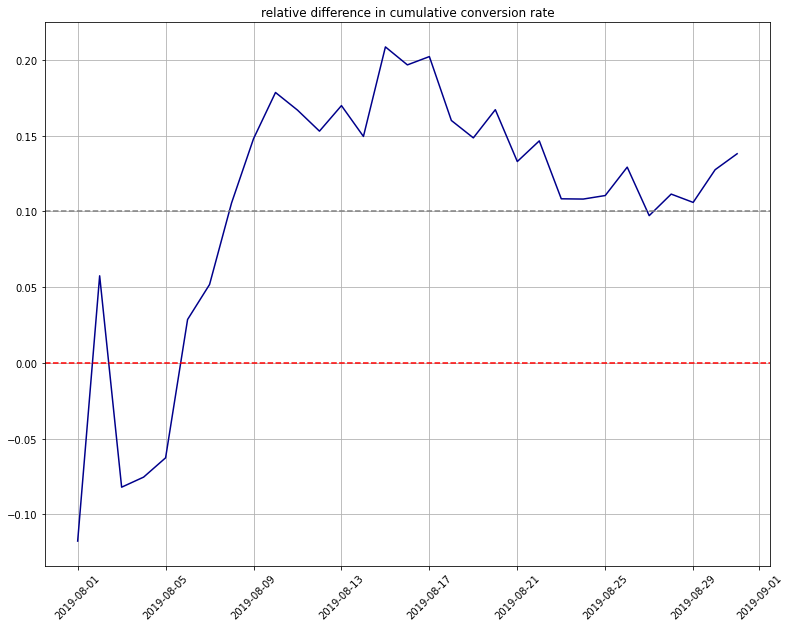

In [37]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date',how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13,10))
plt.title('relative difference in cumulative conversion rate')
plt.xticks(rotation = 45)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,color='darkblue')
plt.grid()
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--');

* Between the dates 01-08-2019 to 06-08-2019: group A lead the conversion except of one day
  * On 02-08-2019 as we see on both of the graphs group B conversion increased considerably and took the lead, decreased again 
* Between the dates 06-08-2019 to 20-08-2019: group B lead the conversion it got higher 20% than group A 
* Between the dates 21-08-2019 to 01-09-2019: group B keep on leading the conversion
  * the rate decreased, nonetheless it kept a nice difference of almost 10% 
* We can consider group B the leader in the conversion rate, its values were higher for a longer period

#### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.


       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


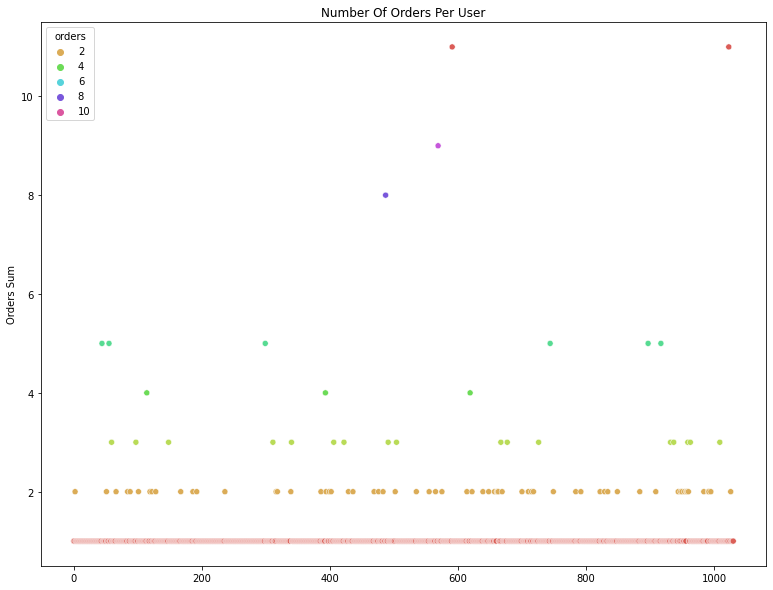

In [38]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.figure(figsize=(13,10))

sns.scatterplot(data = ordersByUsers, x=x_values,y='orders', hue='orders',palette = "hls")
plt.ylabel("Orders Sum")
plt.title("Number Of Orders Per User", size=12)
plt.show()

* Most of the values below 4 
* There are few users with very high numbers of orders, above 10 orders 
  * They might be those senior customers, who are very loyal to the store and not interested in trying another store

#### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [39]:
print(np.percentile(ordersByUsers['orders'], [95,99]))

[2. 4.]


* 95% of the users made up to 2 orders and 99% of the users made up to 4 orders
* Well no surprise that did appear on the last graph 
* We are having some outliers value that need to be taken care of in order to make a proper anaylsis
* The gap between the mean value and the outliers is not very large

#### Plot a scatter chart of order prices. Make conclusions and conjectures.

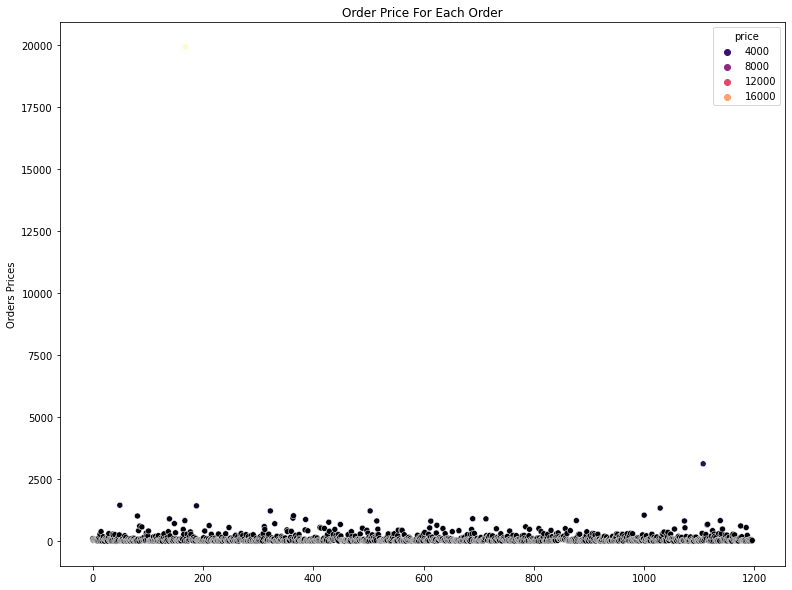

In [40]:
priceOrder = (
    orders.drop(['group', 'visitorId', 'date'], axis=1)
    .groupby('transactionId', as_index=False)
    .agg({'revenue': sum})
)
priceOrder.columns = ['orderId', 'price']
x_values = pd.Series(range(0,len(priceOrder['price'])))
plt.figure(figsize=(13,10))
sns.scatterplot(data = priceOrder, x = x_values,y='price', hue='price',palette = "magma")
plt.ylabel("Orders Prices")
plt.title("Order Price For Each Order", size=12)
plt.show()

* Here there is a massive gap between the mean value and the outlier value 
* Most of the orders costs are below 1000 
* We see an order that cost around 20,000 (outlier)
* There are another outliers value, there is order that cost around 3000 and others that are between 1000-2000

#### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [41]:
print(np.percentile(priceOrder['price'], [95,99]))

[435.54  900.904]


* 95% of the orders cost up to 435.54 
* 99% of the orders cost up to 900.9 
* Not a surprise, that was what we observed from the graph above 

#### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

###### Hypothesis Testing:

* H0 (Null): The conversion rate of the group A One and group B are the same, using the raw data
* H1 (Alternative): The conversion rate of the group A One and group B differs, using the raw data

In [42]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [43]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [44]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.488
0.138


* p-value is lower than 0.05, thus we reject the null hypothesis
* The raw data showed there is a statistically significant difference between the groups
* The relative conversion gain for group B compared with group A is 13.8%

#### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

###### Hypothesis Testing:

* H0 (Null): The average order size of the group A One and group B are the same, using the raw data
* H1 (Alternative): The average order size of the group A One and group B differs, using the raw data

In [45]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.692
0.252


* p-value is much greater than 0.05, there is no reason to reject the null hypothesis
* The raw data showed there are no statistically significant difference between the groups
* Surprisingly The relative difference is slightly high, it is 25.2% 

<font size=130%; color='red'> Filter Data</font>

**Removing the outliers**
* all users with more than 4 orders will be removed 
  * removing 1% customers with the most orders
* all orders that costs more than 600 will be removed
  * removing 1%-5% of cutomers of the most expensive orders

In [46]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 600]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
684     358944393
648     382846391
1137    759473111
339     834731816
Name: visitorId, dtype: int64
(31,)


**In total 31 entries will be removed**

In [47]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [48]:
ordersFiltered =  orders[~orders['visitorId'].isin(abnormalUsers)]

#### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

###### Hypothesis Testing:

* H0 (Null): The conversion rate of the group A One and group B are the same, using the filtered data
* H1 (Alternative): The conversion rate of the group A One and group B differs, using the filtered data

In [49]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.465
0.164


* p-value got lower
  * there is no changes we still reject the null hypothesis 
* The filtered data showed there is a statistically significant difference between the groups
* The relative conversion gain increased, for group B compared with group A it is 16.4% ( raw data = 13.8%)

#### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

###### Hypothesis Testing:

* H0 (Null): The average order size of the group A One and group B are the same, using the filtered data
* H1 (Alternative): The average order size of the group A One and group B differs, using the filtered data

In [50]:
print('{0:.3f}'.format(stats.mannwhitneyu(ordersFiltered[ordersFiltered['group']=='A']['revenue'], ordersFiltered[ordersFiltered['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(ordersFiltered[ordersFiltered['group']=='B']['revenue'].mean()/ordersFiltered[ordersFiltered['group']=='A']['revenue'].mean()-1)) 

0.602
0.066


* p-value deceased slightly, although it still greater than 0.05
  * there is no reason to reject the null hypothesis
* The filtered data showed there are no statistically significant difference between the groups
* The relative difference decreased significantly, it is 6.6% (raw data = 25.2%) 
  * This emphasize that there is not any difference in the purchase size betweent the groups

**Using Mann-Whitney U Test: used to used to determine if two groups are significantly different from each other on a certain variable of interest** 


* We need to find if there is a differences in conversion and  order size between group A and B**
* python has a built in function for the Mann-Whitney U Test

**Mann-Whitney U Test can help us answering the questions, and easy to use at the same time**

#### Make a decision based on the test results. The possible decisions are: 
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups.
3. Continue the test.

In [51]:
# getting aggregated cumulative daily data on orders 
ordersFilter = orders.copy()
ordersFilter = ordersFilter[ordersFilter.revenue <= 600]
ordersAggregatedFilter = datesGroups.apply(lambda x: ordersFilter[np.logical_and(ordersFilter['date'] <= x['date'], ordersFilter['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


# merging the two tables into one and giving its columns descriptive names
cumulativeDataFilter = ordersAggregatedFilter.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeDataFilter.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']
cumulativeDataFilter['conversion'] = cumulativeDataFilter['orders']/cumulativeDataFilter['visits']
cumulativeDataA = cumulativeDataFilter[cumulativeDataFilter['group']=='A']
cumulativeDataB = cumulativeDataFilter[cumulativeDataFilter['group']=='B']

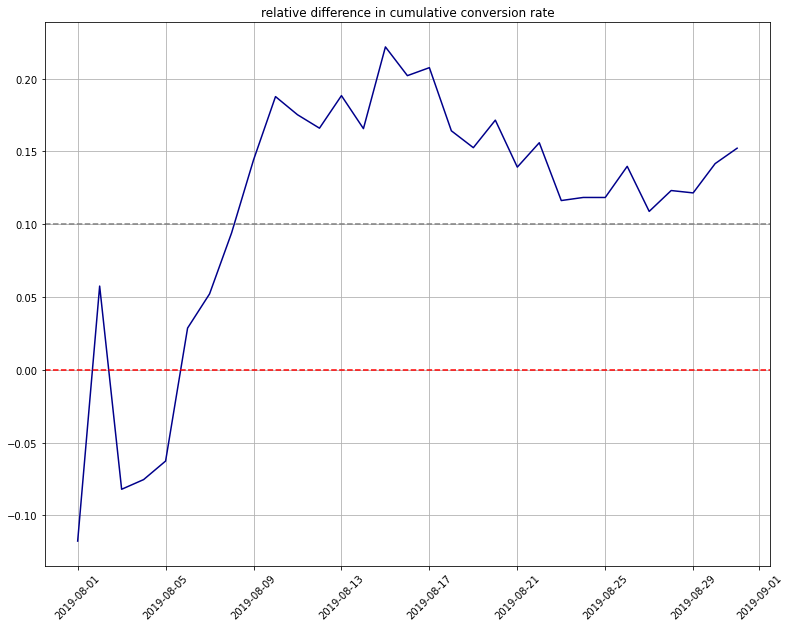

In [52]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date',how='left', suffixes=['A', 'B'])
plt.figure(figsize=(13,10))
plt.title('relative difference in cumulative conversion rate')
plt.xticks(rotation = 45)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,color='darkblue')
plt.grid()
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--');

* There is no such a difference between the graph of the filtered data and the one of the raw data(2.4.4)
* The graph of the filtered data above emphasize the statiscal difference between group A & group B 
* Group B lead the conversion from 06-08-2019 and on

In [53]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueFilterA = cumulativeDataFilter[cumulativeDataFilter['group']=='A'][['date','revenue','orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueFilterB = cumulativeDataFilter[cumulativeDataFilter['group']=='B'][['date','revenue','orders']]

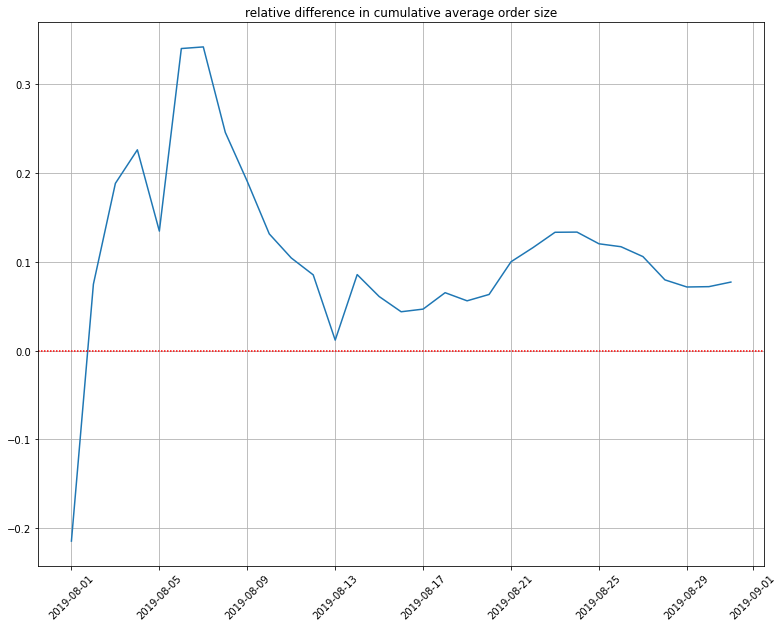

In [54]:
mergedCumulativeRevenue = cumulativeRevenueFilterA.merge(cumulativeRevenueFilterB, left_on='date', right_on='date', how='left',suffixes=['A', 'B'])
plt.figure(figsize=(13,10))
plt.title('relative difference in cumulative average order size')
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='red', linestyle=(0, (1, 1))) 
plt.xticks(rotation = 45)
plt.grid();

* The graph above of the filtered data is very different from the one of the raw data(2.4.3)
  * especially from 13-08-2019 and on
* The graph of the filtered data above prove that there is no considerable difference in the order size between the groups

**We should stop the test, there is a statsically difference between the groups in terms of conversion, group B has a significantly higher rate than this of group A, the relative difference is around 13%**